<a href="https://colab.research.google.com/github/hank0705/nutn_bigdata/blob/main/0413.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pkgs <- c("tidyverse", "lubridate")
install.packages(pkgs)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(lubridate)

In [ ]:
nobel <- read.csv("nobel_winners.csv")
nobel

In [ ]:
nobel %>% count(category)

In [ ]:
nobel %>%
  count(category) %>%
  ggplot(aes(x = category, y = n, fill = category))+
  geom_col() +
  geom_text(aes(label = n), vjust = -0.25)+
  labs(title = "Different subject's winning nobel price times chart", x = "Subject", y = "Quantity") + 
  theme(legend.position = "none")

In [ ]:
nobel %>%
  count(category) %>%
  ggplot(aes(x = fct_reorder(category, n),y = n, fill = category)) +
  geom_col() +
  geom_text(aes(label = n), vjust = -0.25) +
  labs(title = "Different subject's winning nobel price times chart", x = "Subject", y = "Quantity") + theme(legend.position = "none")

In [ ]:
install.packages("devtools")
devtools::install_github("cttobin/ggthemr")

library(ggthemr)
ggthemr("dust")

In [ ]:
nobel %>%
  count(category) %>%
  ggplot(aes(x = fct_reorder(category, n),y = n, fill = category)) +
  geom_col() +
  geom_text(aes(label = n), vjust = -0.25) +
  labs(title = "Different subject's winning nobel price times chart", x = "Subject", y = "Quantity") + 
  theme(legend.position = "none")

In [ ]:
nobel %>%
  count(category) %>%
  ggplot(aes(x = fct_reorder(category, n),y = n)) +
  geom_col(fill = c("#003f5c", "#444e86", "#955196","#dd5182", "#ff6e54", "#ffa600")) +
  labs(title = "Different subject's winning nobel price times chart", x = "Subject", y = "Quantity") + 
  theme(legend.position = "none")

In [ ]:
nobel %>%
  dplyr::filter(birth_country == "United States of America") %>%
  dplyr::select(full_name, prize_year, category)

In [ ]:
nobel %>%
  dplyr::filter(birth_country == "Taiwan") %>%
  dplyr::select(full_name, prize_year, category)

In [ ]:
nobel_winners <- nobel %>%
  mutate_if(is.character, tolower) %>%
  distinct_at(vars(full_name, prize_year, category), .keep_all = "TRUE") %>%
  mutate(
    decade = 10 * (prize_year %/% 10),
    prize_age = prize_year - year(birth_date)
  )

  nobel_winners

In [ ]:
nobel_winners %>% count(full_name, sort = T)

In [ ]:
nobel_winners %>%
  count(prize_age) %>%
  ggplot(aes(x = prize_age, y = n)) +
  geom_col()

In [ ]:
nobel_winners %>%
  group_by(category) %>%
  summarise(mean_prize_age = mean(prize_age, na.rm = T))

In [ ]:
nobel_winners %>%
  mutate(category = fct_reorder(category, prize_age, median, na.rm = "TRUE")) %>%
  ggplot(aes(category,prize_age)) +
  geom_point() +
  geom_boxplot() +
  coord_flip()

In [46]:
install.packages("ggridges")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
library(ggridges)

nobel_winners %>%
ggplot(aes(
  x = prize_age,
  y = category,
  fill = category
)) +
geom_density_ridges()

In [ ]:
nobel_winners %>%
  dplyr::filter(laureate_type == "individual") %>%
  count(category, gender) %>%
  group_by(category) %>%
  mutate(prop = n / sum(n))

In [ ]:
nobel_winners %>%
  dplyr::filter(laureate_type == "individual") %>%
  count(decade, category, gender) %>%
  group_by(category) %>%
  mutate(prop = n / sum(n)) %>%
  ggplot(aes(decade, category, fill = prop)) +
  geom_tile(size = 0.7) +
  geom_text(aes(label = scales::number(prop, accuracy = .01)))+
  facet_grid(vars(gender)) +
  scale_fill_gradient(low ="111100" , high = "110101")

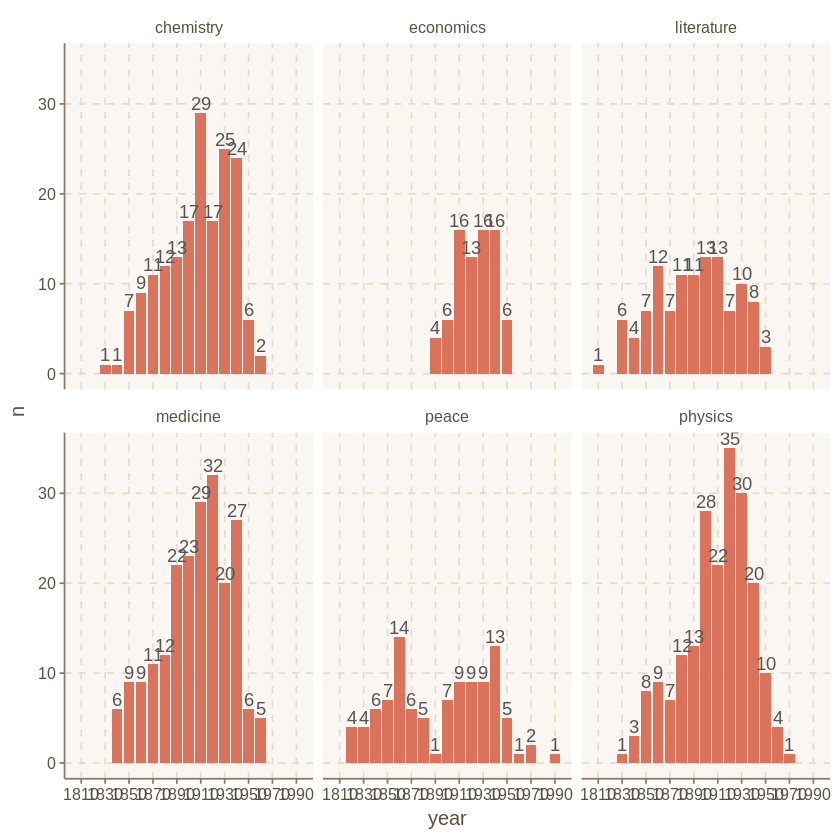

In [52]:
nobel_winners %>%
  select(category, birth_date) %>%
  mutate(year = floor(year(birth_date) / 10) * 10) %>%
  count(category,year) %>%
  dplyr::filter(!is.na(year)) %>%
  ggplot(aes(x = year, y = n)) +
  geom_col() +
  scale_x_continuous(breaks = seq(1810, 1990, 20)) +
  geom_text(aes(label = n), vjust = -0.25) +
  facet_wrap(vars(category))